# Matplotlib 入门

## 一. matplotlib架构

### 1.1 容器层

容器层主要由Canvas、Figure、Axes组成。

Canvas是位于最底层的系统层，在绘图的过程中充当画板的角色，即放置画布(Figure)的工具。

Figure是Canvas上方的第一层，也是需要用户来操作的应用层的第一层，在绘图的过程中充当画布的角色。

Axes是应用层的第二层，在绘图的过程中相当于画布上的绘图区的角色。

* Figure:指整个图形(可以通过plt.figure()设置画布的大小和分辨率等)
* Axes(坐标系):数据的绘图区域
* Axis(坐标轴)：坐标系中的一条轴，包含大小限制、刻度和刻度标签
特点为：

一个figure(画布)可以包含多个axes(坐标系/绘图区)，但是一个axes只能属于一个figure。
一个axes(坐标系/绘图区)可以包含多个axis(坐标轴)，包含两个即为2d坐标系，3个即为3d坐标系 

### 1.2 辅助显示层

辅助显示层为Axes(绘图区)内的除了根据数据绘制出的图像以外的内容，主要包括Axes外观(facecolor)、边框线(spines)、坐标轴(axis)、坐标轴名称(axis label)、坐标轴刻度(tick)、坐标轴刻度标签(tick label)、网格线(grid)、图例(legend)、标题(title)等内容。

该层的设置可使图像显示更加直观更加容易被用户理解，但又不会对图像产生实质的影响。

### 1.3 图像层

图像层指Axes内通过plot、scatter、bar、histogram、pie等函数根据数据绘制出的图像。

## 二. 画图
### 2.1 折线图
```matplotlib.pyplot```作用于当前图形(figure)的当前坐标系(axes)。

添加自定义x,y刻度
* plt.xticks(x, **kwargs) x:要显示的刻度值
* plt.yticks(y, **kwargs) y:要显示的刻度值

添加网格显示   
* plt.grid(True, linestyle='--', alpha=0.5)

In [2]:
import matplotlib.pyplot as plt

# 1）创建画布(容器层),并修改图片大小(figsize),调整清晰度(dpi)
plt.figure(figsize=(20,8),dpi=100)

x = [1,2,3,4,5,6,7]
y = [17,17,18,15,11,11,13]

# 2）绘制折线图(图像层)
plt.plot(x,y)

# 3) 附注显示层,调整刻度
plt.xticks(x[: : 2])
plt.grid(True, linestyle='--', alpha=0.5)

#保存图片: png,jpg,svg(矢量图)
plt.savefig("a.png")
plt.show()

<Figure size 2000x800 with 1 Axes>

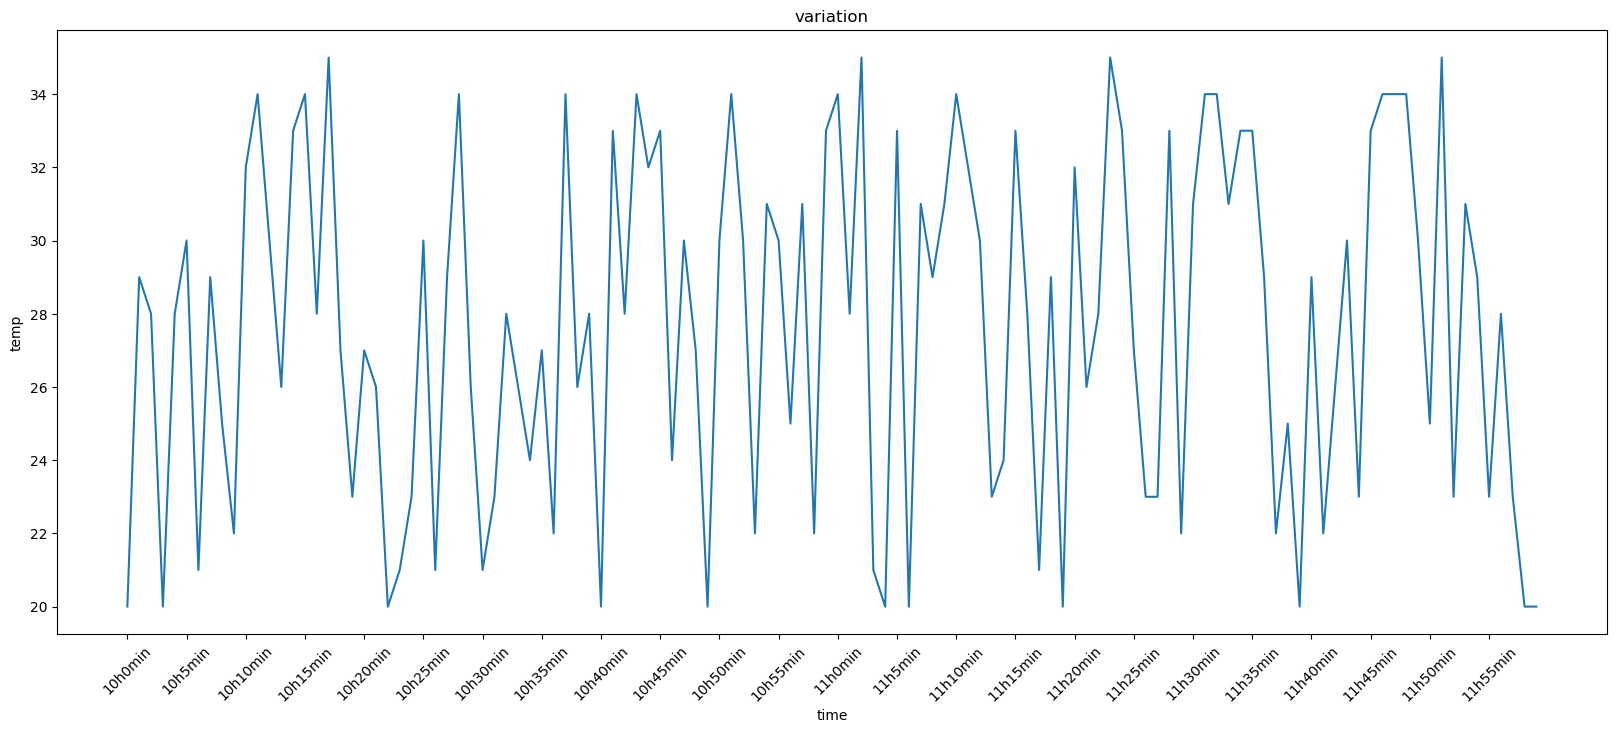

In [3]:
import random

plt.figure(figsize=(20,8),dpi=100)
x=range(120)

#生产列表数据
_xticks = ["10h{}min".format(i) for i in x if i<60]
_xticks += ["11h{}min".format(i-60) for i in x if i>=60]

y=[random.randint(20,35) for i in range(120)]

plt.plot(x,y)

#修改刻度
#将对应的刻度数值转换为刻度内容
plt.xticks(x[::5],_xticks[::5],rotation=45)

plt.xlabel('time')
plt.ylabel('temp')
plt.title('variation')
plt.show()

### 2.1 多次plot

设置图形风格
![](http://pjpf9017m.bkt.clouddn.com/picstyle.png)
显示图例
* 注意：如果只在plt.plot()中设置label还不能最终显示出图例，还需要通过plt.legend()将图例显示出来。   
```plt.legend(loc=0)```
![](http://pjpf9017m.bkt.clouddn.com/20181230231547.png)

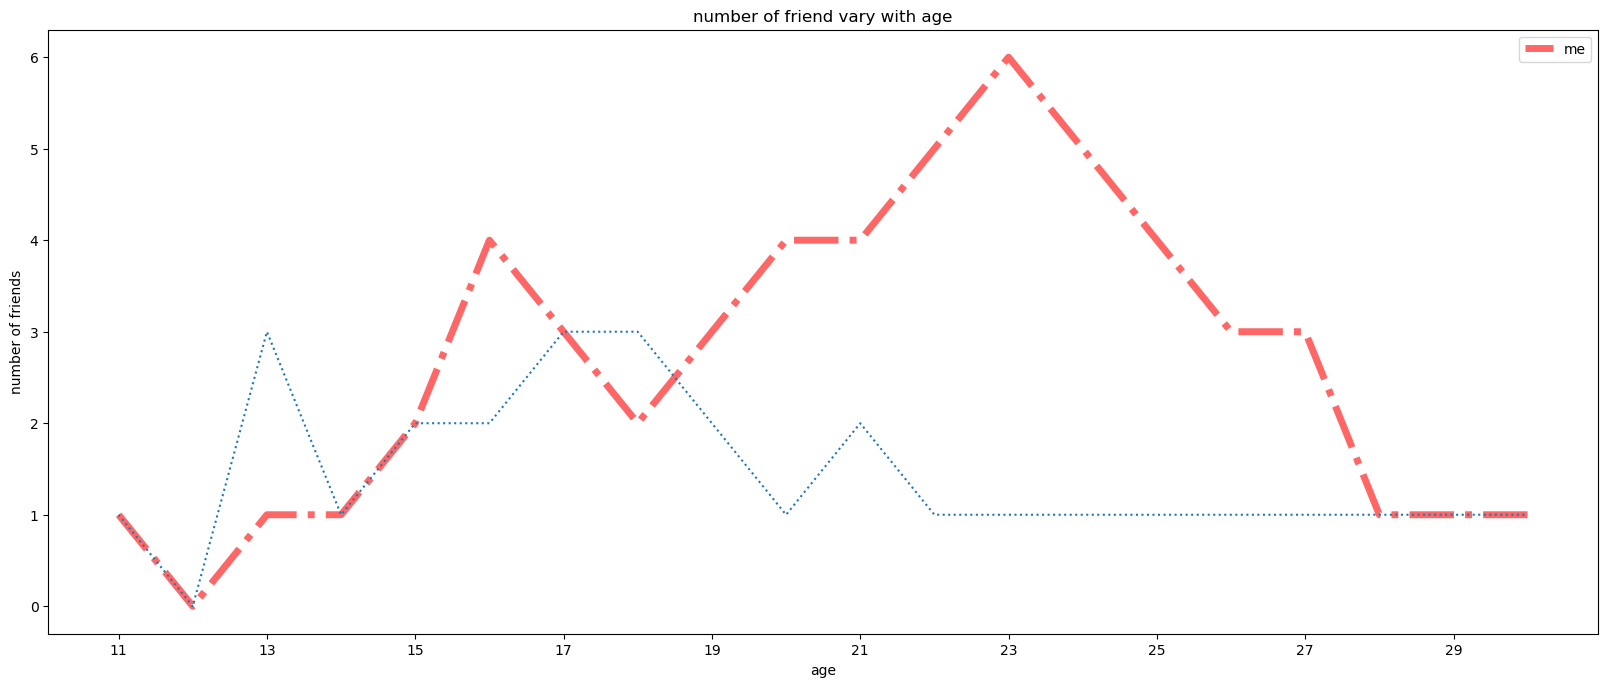

In [4]:
# 假设大家在30岁的时候,根据自己的实际情况,统计出来了从11岁到30岁每年交的女(男)朋友的数量如列表a,
# 请绘制出该数据的折线图,以便分析自己每年交女(男)朋友的数量走势

plt.figure(figsize=(20,8),dpi=100)
x = range(11,31)
a = [1,0,1,1,2,4,3,2,3,4,4,5,6,5,4,3,3,1,1,1]
b = [1,0,3,1,2,2,3,3,2,1,2,1,1,1,1,1,1,1,1,1]


_xticks = ["{}".format(i) for i in x]
plt.plot(x,a,linewidth=5,linestyle="-.",alpha=0.6,color='r',label='me') #linewidth加粗,alpha透明度
plt.plot(x,b,linestyle=":",label='') #linestyle 线的样式

plt.xticks(x[::2],_xticks[::2])
plt.xlabel("age")
plt.ylabel("number of friends")
plt.title("number of friend vary with age")

plt.legend(loc=0)

plt.show()

### 2.2 多个坐标系显示 


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
x = np.linspace(-np.pi,np.pi,100)
y1 = np.tanh(x)
y2 = np.exp(x)
y3 = np.sin(np.pi*x)
y4 = 1/x

#### 2.2.1 subplot
在已有的figure里在给定的坐标下画子图

```
subplot(*args, **kwargs)
    Return a subplot axes at the given grid position.
    
    Call signature::
    
       subplot(nrows, ncols, index, **kwargs)
    
    In the current figure, create and return an `.Axes`, at position *index*
    of a (virtual) grid of *nrows* by *ncols* axes.  Indexes go from 1 to
    ``nrows * ncols``, incrementing in row-major order.
    
    If *nrows*, *ncols* and *index* are all less than 10, they can also be
    given as a single, concatenated, three-digit number.
    
    For example, ``subplot(2, 3, 3)`` and ``subplot(233)`` both create an
    `.Axes` at the top right corner of the current figure, occupying half of
    the figure height and a third of the figure width.
```

Text(0,0.5,'y4 value')

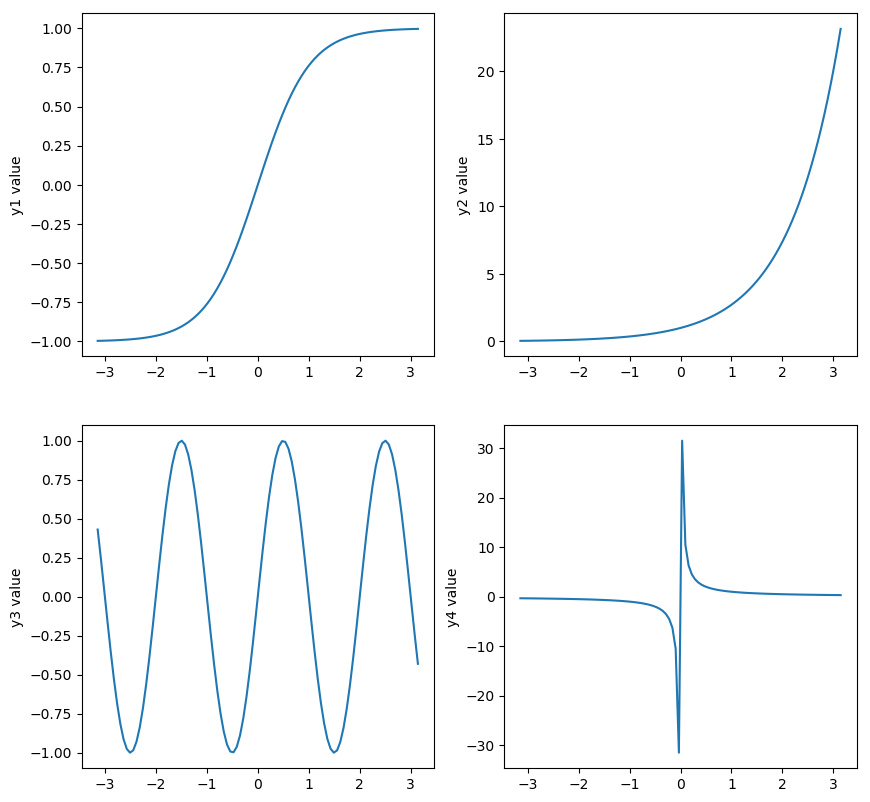

In [7]:
plt.figure(figsize=(10,10),dpi=100)

plt.subplot(221)
plt.plot(x,y1,label='tan(x)')
plt.ylabel('y1 value')

plt.subplot(222)
plt.plot(x,y2,label='e^x')
plt.ylabel('y2 value')

plt.subplot(223)
plt.plot(x,y3,label='sin(x)')
plt.ylabel('y3 value')

plt.subplot(224)
plt.plot(x,y4,label='1/x')
plt.ylabel('y4 value')

#### 2.2.2 add_subplot

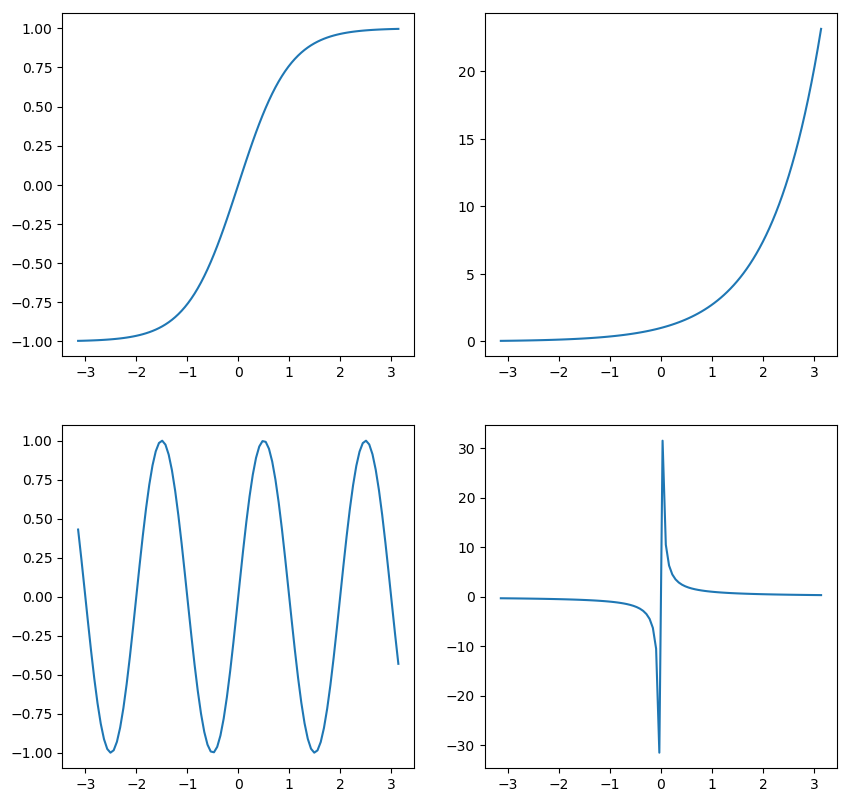

In [8]:
fig = plt.figure(figsize=(10,10),dpi=100)

ax1 = fig.add_subplot(221)
ax1.plot(x,y1)

ax2 = fig.add_subplot(222)
ax2.plot(x,y2)

ax3 = fig.add_subplot(223)
ax3.plot(x,y3)

ax4 = fig.add_subplot(224)
ax4.plot(x,y4)

#### 2.2.3 subplots
matplotlib.pyplot.subplots(nrows=1, ncols=1, **fig_kw) 创建一个带有多个axes(坐标系/绘图区)的图
```
Parameters:    

nrows, ncols : int, optional, default: 1, Number of rows/columns of the subplot grid.
**fig_kw : All additional keyword arguments are passed to the figure() call.

Returns:    
fig : 图对象
ax : 子图
    设置标题等方法不同：
    set_xticks
    set_yticks
    set_xlabel
    set_ylabel
```

```
fig, ax = plt.subplots()
等价于 :
fig = plt.figure()
ax = plt.subplot(111)
```

关于axes子坐标系的更多方法：参考https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes

* 注意：plt.函数名()相当于面向过程的画图方法，axes.set_方法名()相当于面向对象的画图方法。

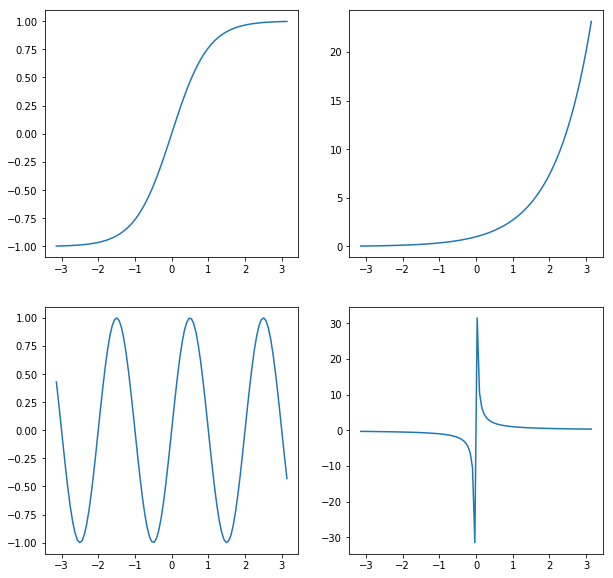

In [9]:
figure, ax = plt.subplots(2,2,figsize=(10,10))
ax[0][0].plot(x,y1)
ax[0][1].plot(x,y2)
ax[1][0].plot(x,y3)
ax[1][1].plot(x,y4)

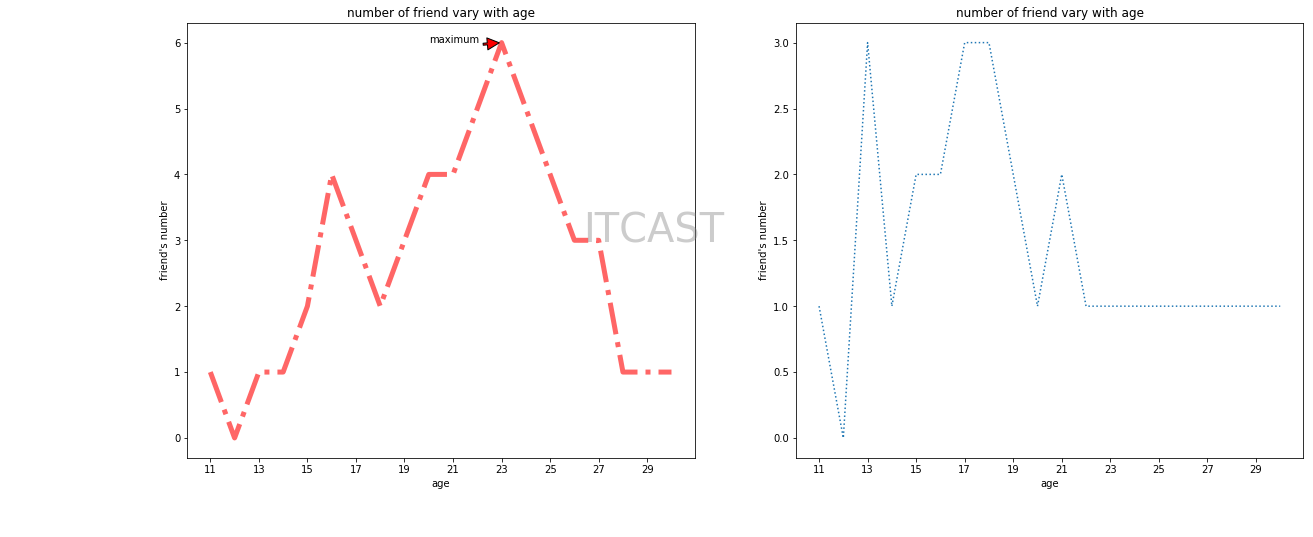

In [10]:
def set_ax(ax):
    plt.sca(ax) # 将绘图区域指定到ax,将ax的画布指定为当前画布
    plt.xticks(x[::2],_xticks[::2])
    plt.xlabel("age")
    plt.ylabel("friend's number")
    plt.title("number of friend vary with age")
    
    plt.annotate(
        'maximum',  # 显示字符串
        xy=(23, 6),  # 箭头位置
        xytext=(20,6),  # 文本位置
        arrowprops=dict(facecolor='red', shrink=0.1, width=2)  # facecolor:箭头颜色；shrink:箭头的起始和结束位置两侧的空白大小；width:箭头宽度
    )


#nrows: 行
#ncols: 列
#axes: 绘图区域

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8))

x = range(11,31)
a = [1,0,1,1,2,4,3,2,3,4,4,5,6,5,4,3,3,1,1,1]
b = [1,0,3,1,2,2,3,3,2,1,2,1,1,1,1,1,1,1,1,1]


_xticks = ["{}".format(i) for i in x]
axes[0].plot(x,a,linewidth=5,linestyle="-.",alpha=0.6,color='r') #linewidth加粗,alpha透明度
axes[1].plot(x,b,linestyle=":") #linestyle 线的样式

set_ax(axes[0])
set_ax(axes[1])
fig.text(0.4, 0.5, 'ITCAST',fontsize=40,color='gray',alpha=0.4) #加水印


plt.show()

In [11]:
print(fig) 
print(axes)

Figure(1440x576)


### 2.3 绘制散点图

假设通过爬虫你获取到了北京2016年3,10月份每天白天的最高气温(分别位于列表a,b),那么此时如何寻找出气温的整体分布规律某种规律?

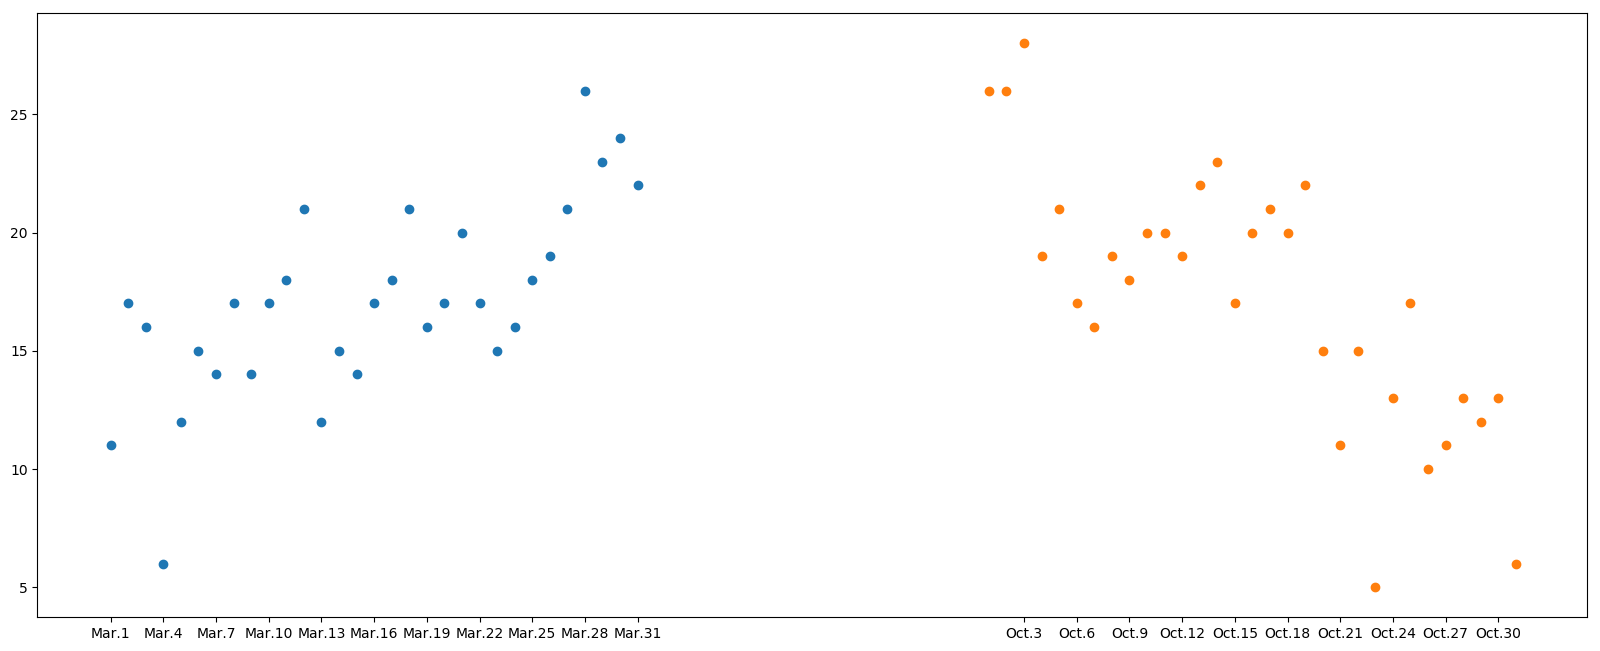

In [12]:
plt.figure(figsize=(20,8),dpi=100)
x1 = range(1,32)
x2 = range(51,82)
_x = list(x1)+list(x2)

_xticks = ["Mar.{}".format(i) for i in x1]
_xticks += ["Oct.{}".format(i) for i in x1]

a = [11,17,16,6,12,15,14,17,14,17,18,21,12,15,14,17,18,21,16,17,20,17,15,16,18,19,21,26,23,24,22]
b = [26,26,28,19,21,17,16,19,18,20,20,19,22,23,17,20,21,20,22,15,11,15,5,13,17,10,11,13,12,13,6]


plt.xticks(_x[::3],_xticks[::3])

plt.scatter(x1,a)
plt.scatter(x2,b)
plt.show()

### 2.4 绘制条形图

 matplotlib.pyplot.bar(x, width, align='center', **kwargs)

```
Parameters:    
x : sequence of scalars.

width : scalar or array-like, optional
柱状图的宽度

align : {‘center’, ‘edge’}, optional, default: ‘center’
Alignment of the bars to the x coordinates:
‘center’: Center the base on the x positions.
‘edge’: Align the left edges of the bars with the x positions.
每个柱状图的位置对齐方式

**kwargs :
color:选择柱状图的颜色

Returns:    
`.BarContainer`
Container with all the bars and optionally errorbars.

```

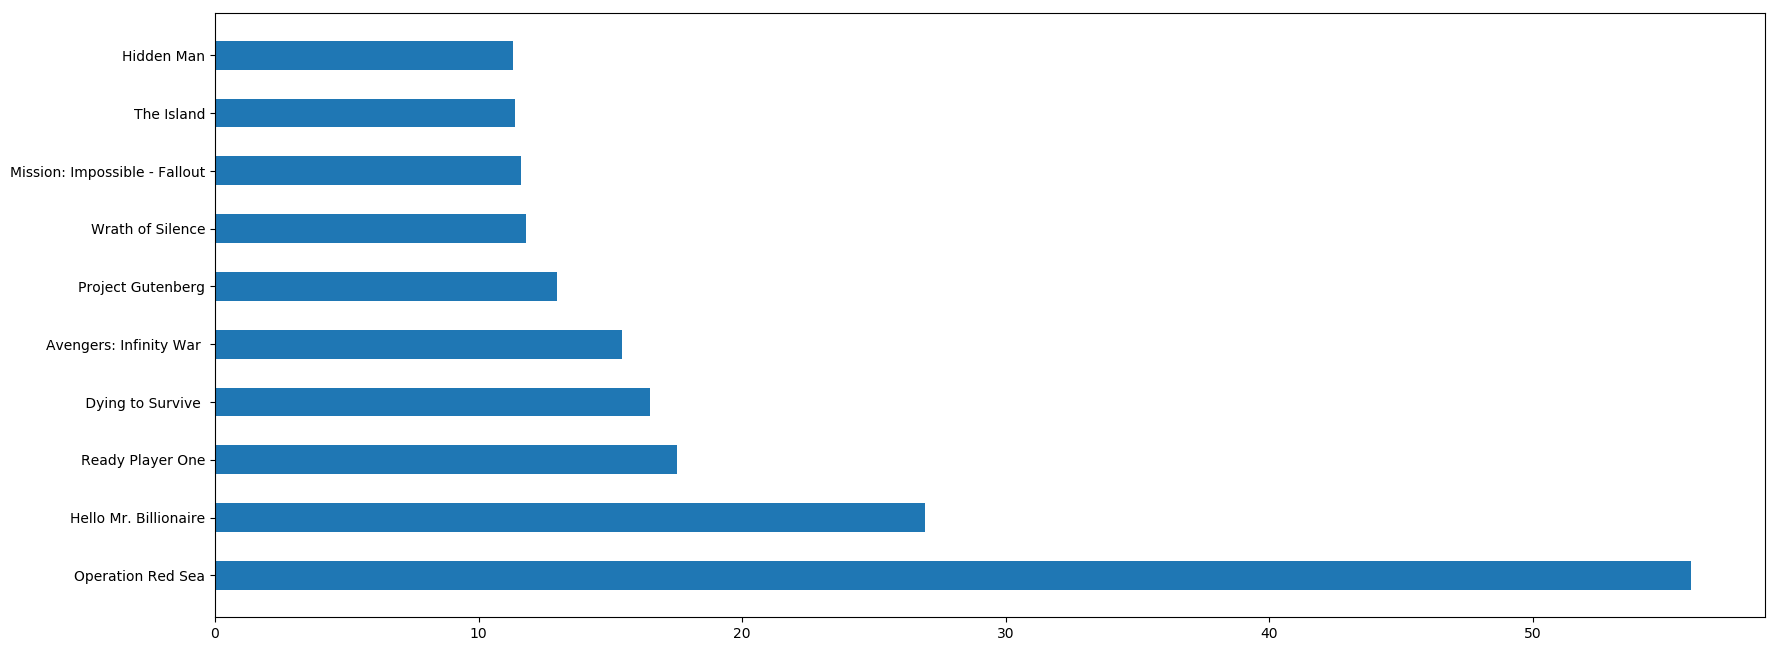

In [22]:
# 2018年内地电影票房前10的电影(列表a)和电影票房数据(列表b),那么如何更加直观的展示该数据?

plt.figure(figsize=(20,8),dpi=100)

a = ["Operation Red Sea","Hello Mr. Billionaire","Ready Player One"," Dying to Survive ","Avengers: Infinity War ","Project Gutenberg","Wrath of Silence","Mission: Impossible - Fallout",'The Island','Hidden Man']

b= [56.01, 26.94, 17.53, 16.49, 15.45, 12.96, 11.8, 11.61,11.4,11.3] 

x = range(len(a))

#绘制条形图
#绘制竖直的条形图
#plt.bar(x,b,width=0.5)

#绘制水平条形图
plt.barh(x,b,height=0.5)

#plt.xticks(x,a,rotation=45)
plt.yticks(x,a)

plt.show()

多次plt.bar

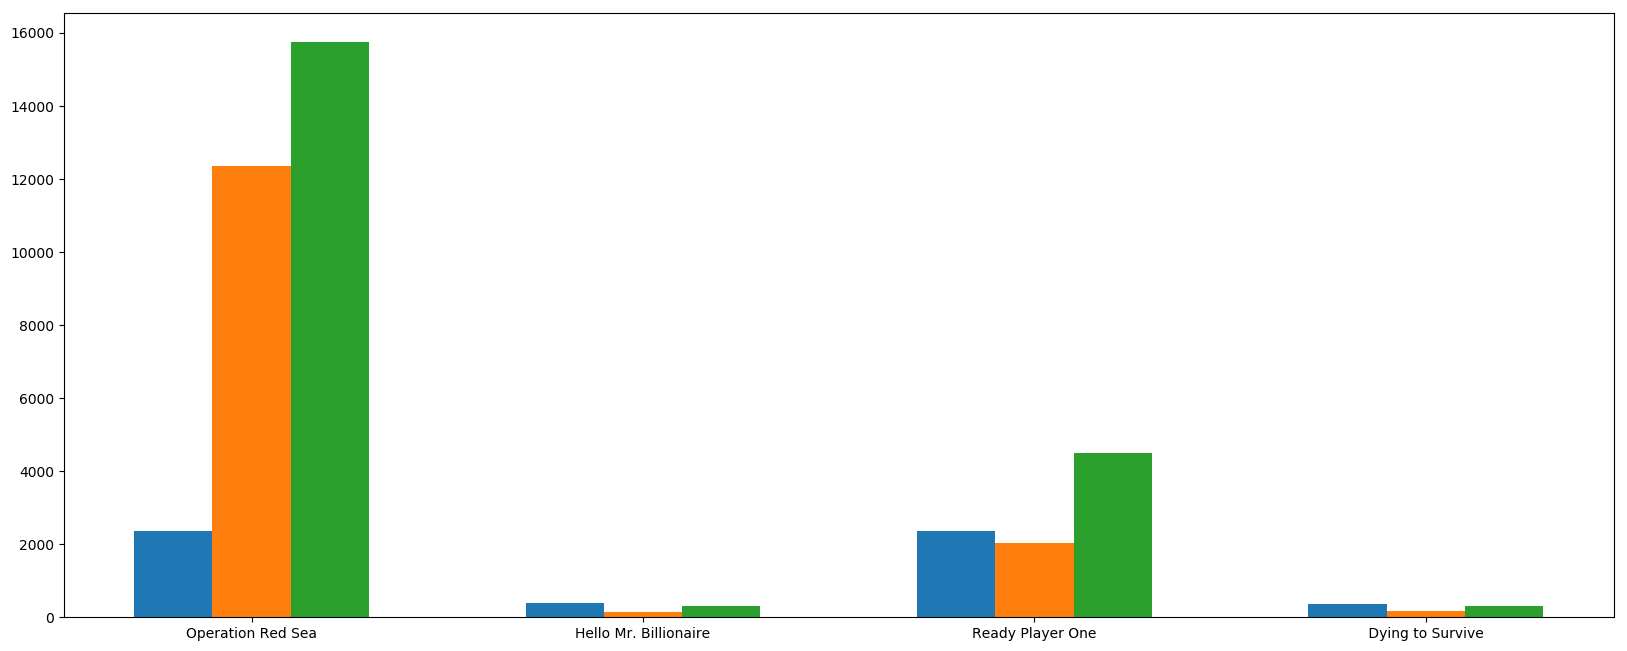

In [24]:
#知道了列表a中电影分别在2018-09-14(b_14), 2018-09-15(b_15), 2018-09-16(b_16)三天的票房,展示列表中电影本身的票房以及同其他电影的数据对比情况

plt.figure(figsize=(20,8),dpi=100)
a = ["Operation Red Sea","Hello Mr. Billionaire","Ready Player One"," Dying to Survive "]

bar_width = 0.2

x_14 = range(len(a))
x_15 = [i + bar_width for i in x_14]
x_16 = [i + bar_width for i in x_15]

b_16 = [15746,312,4497,319]
b_15 = [12357,156,2045,168]
b_14 = [2358,399,2358,362]

plt.bar(x_14,b_14,width=bar_width)
plt.bar(x_15,b_15,width=bar_width)
plt.bar(x_16,b_16,width=bar_width)

plt.xticks(x_15,a)

plt.show()

### 2.5 绘制直方图

直方图牵涉统计学的概念，首先要对数据进行分组，然后统计每个分组内数据元的数量。 在坐标系中，横轴标出每个组的端点，纵轴表示频数，每个矩形的高代表对应的频数，称这样的统计图为频数分布直方图。

相关概念:    
组数：在统计数据时，我们把数据按照不同的范围分成几个组，分成的组的个数称为组数   
组距：每一组两个端点的差  

matplotlib.pyplot.hist(x, bins=None, normed=None, **kwargs)

```
Parameters:    
x : (n,) array or sequence of (n,) arrays

bins(组数) : integer or sequence or ‘auto’, optional, 可以是整数也可以是列表

```

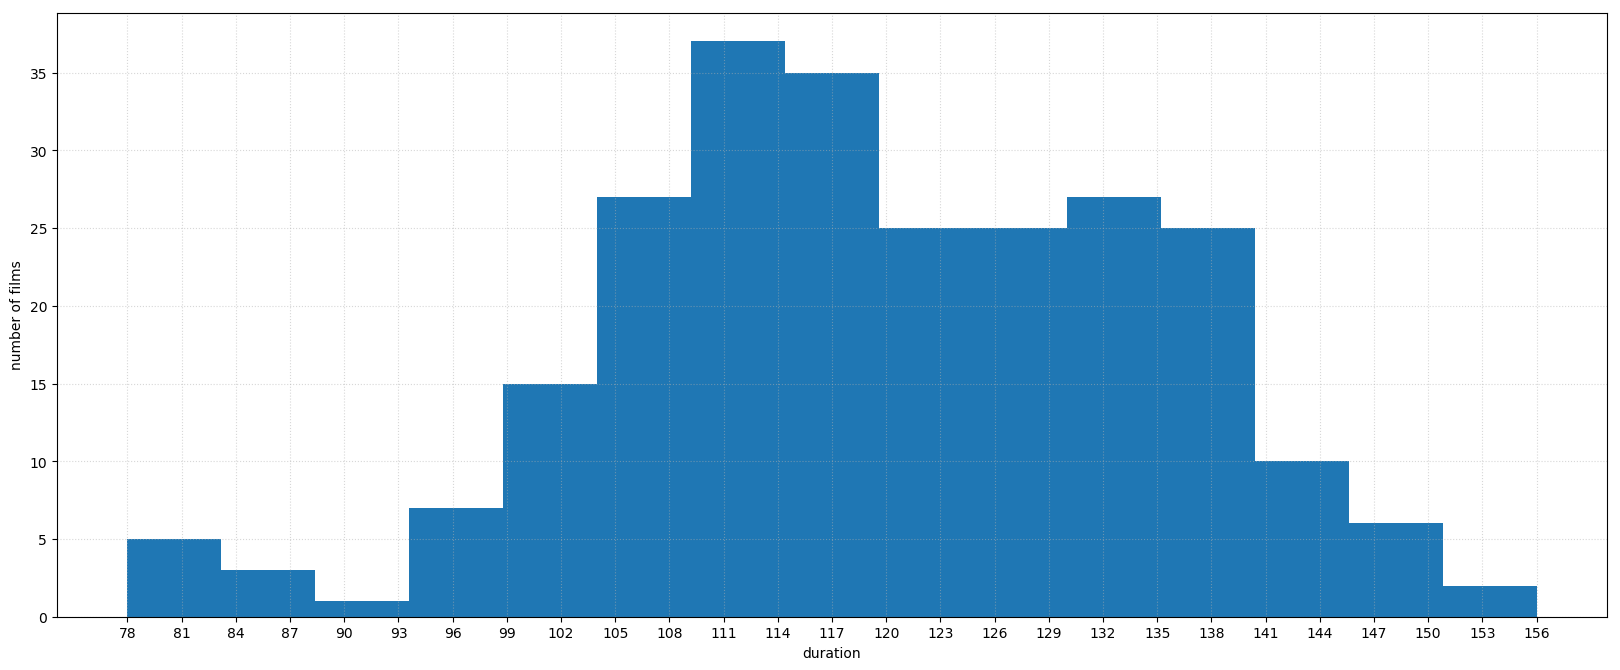

In [29]:
# 获取250部电影的时长(列表a中),用直方图统计时长分布

plt.figure(figsize=(20,8),dpi=100)

a=[131,  98, 125, 131, 124, 139, 131, 117, 128, 108, 135, 138, 131, 102, 107, 114, 119, 128, 121, 142, 127, 130, 124, 101, 110, 116, 117, 110, 128, 128, 115,  99, 136, 126, 134,  95, 138, 117, 111,78, 132, 124, 113, 150, 110, 117,  86,  95, 144, 105, 126, 130,126, 130, 126, 116, 123, 106, 112, 138, 123,  86, 101,  99, 136,123, 117, 119, 105, 137, 123, 128, 125, 104, 109, 134, 125, 127,105, 120, 107, 129, 116, 108, 132, 103, 136, 118, 102, 120, 114,105, 115, 132, 145, 119, 121, 112, 139, 125, 138, 109, 132, 134,156, 106, 117, 127, 144, 139, 139, 119, 140,  83, 110, 102,123,107, 143, 115, 136, 118, 139, 123, 112, 118, 125, 109, 119, 133,112, 114, 122, 109, 106, 123, 116, 131, 127, 115, 118, 112, 135,115, 146, 137, 116, 103, 144,  83, 123, 111, 110, 111, 100, 154,136, 100, 118, 119, 133, 134, 106, 129, 126, 110, 111, 109, 141,120, 117, 106, 149, 122, 122, 110, 118, 127, 121, 114, 125, 126,114, 140, 103, 130, 141, 117, 106, 114, 121, 114, 133, 137,  92,121, 112, 146,  97, 137, 105,  98, 117, 112,  81,  97, 139, 113,134, 106, 144, 110, 137, 137, 111, 104, 117, 100, 111, 101, 110,105, 129, 137, 112, 120, 113, 133, 112,  83,  94, 146, 133, 101,131, 116, 111,  84, 137, 115, 122, 106, 144, 109, 123, 116, 111,111, 133, 150]

d = 5

# 分组: 组数等于极差/组距  极差:最大值-最小值
num_bins = (max(a)-min(a))//5   # //整除

plt.hist(a,num_bins)

plt.xticks(range(min(a),max(a)+1)[::3])

#绘制网格线
plt.grid(linestyle=":",alpha=0.5)

# 添加x, y轴描述信息
plt.xlabel("duration")
plt.ylabel("number of films")

plt.show()

用整除方法得出的组距使横坐标的现实不完美,可以考虑用列表做组距

[78, 83, 88, 93, 98, 103, 108, 113, 118, 123, 128, 133, 138, 143, 148, 153, 158]


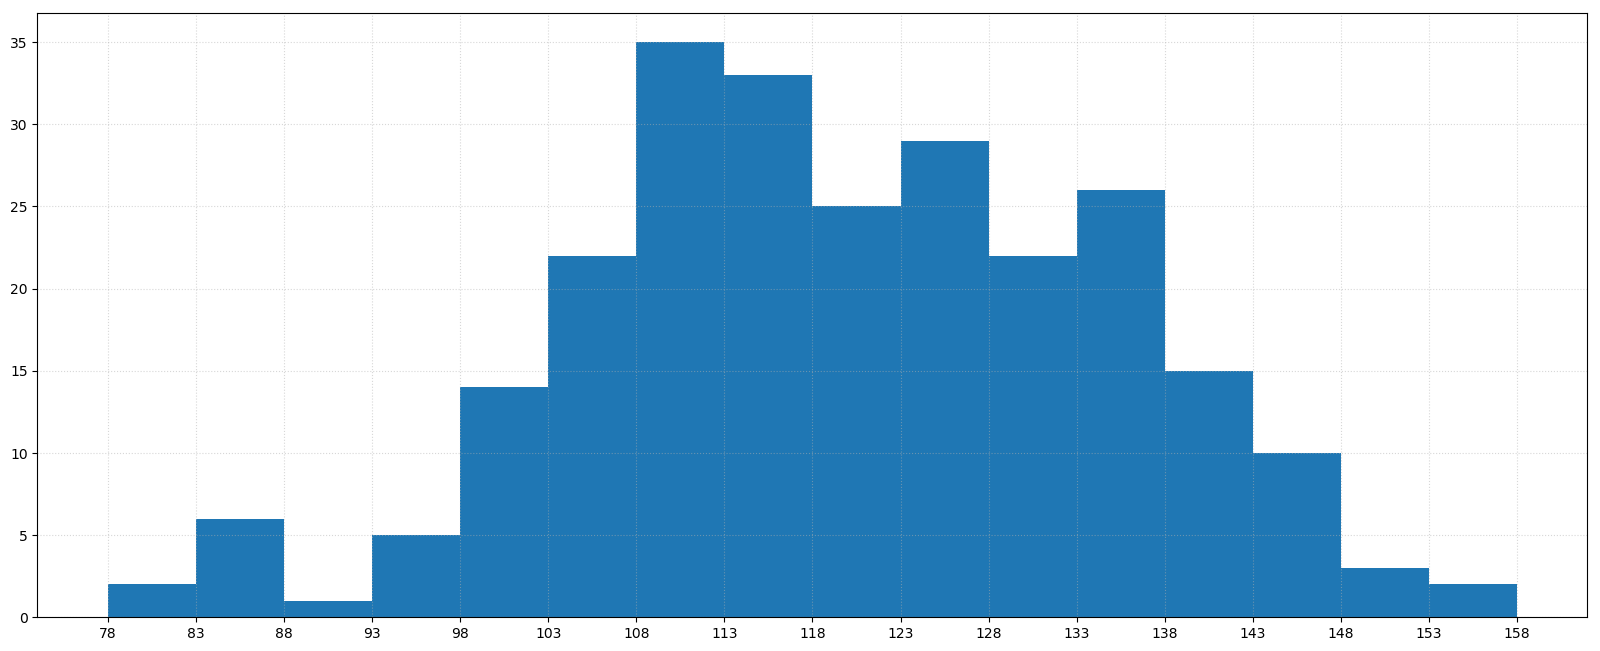

In [16]:
plt.figure(figsize=(20,8),dpi=100)

a=[131,  98, 125, 131, 124, 139, 131, 117, 128, 108, 135, 138, 131, 102, 107, 114, 119, 128, 121, 142, 127, 130, 124, 101, 110, 116, 117, 110, 128, 128, 115,  99, 136, 126, 134,  95, 138, 117, 111,78, 132, 124, 113, 150, 110, 117,  86,  95, 144, 105, 126, 130,126, 130, 126, 116, 123, 106, 112, 138, 123,  86, 101,  99, 136,123, 117, 119, 105, 137, 123, 128, 125, 104, 109, 134, 125, 127,105, 120, 107, 129, 116, 108, 132, 103, 136, 118, 102, 120, 114,105, 115, 132, 145, 119, 121, 112, 139, 125, 138, 109, 132, 134,156, 106, 117, 127, 144, 139, 139, 119, 140,  83, 110, 102,123,107, 143, 115, 136, 118, 139, 123, 112, 118, 125, 109, 119, 133,112, 114, 122, 109, 106, 123, 116, 131, 127, 115, 118, 112, 135,115, 146, 137, 116, 103, 144,  83, 123, 111, 110, 111, 100, 154,136, 100, 118, 119, 133, 134, 106, 129, 126, 110, 111, 109, 141,120, 117, 106, 149, 122, 122, 110, 118, 127, 121, 114, 125, 126,114, 140, 103, 130, 141, 117, 106, 114, 121, 114, 133, 137,  92,121, 112, 146,  97, 137, 105,  98, 117, 112,  81,  97, 139, 113,134, 106, 144, 110, 137, 137, 111, 104, 117, 100, 111, 101, 110,105, 129, 137, 112, 120, 113, 133, 112,  83,  94, 146, 133, 101,131, 116, 111,  84, 137, 115, 122, 106, 144, 109, 123, 116, 111,111, 133, 150]

d = 5

#num_bins可以是个数字也可以是个列表(分组后,每个组的节点)
num_bins = [min(a)+i*d for i in range(17)]
print(num_bins)


plt.hist(a,num_bins)

plt.xticks(num_bins)

#绘制网格线
plt.grid(linestyle=":",alpha=0.5)


plt.show()

### 2.6 绘制饼图

plt.pie(x, labels=,autopct=,colors)   
x:数量，自动算百分比   
labels:每部分名称   
autopct:占比显示指定%3.2f%%    
colors:每部分颜色   

* 为了让显示的饼图保持圆形，需要添加axis保证长宽一样
```plt.axis('equal')```

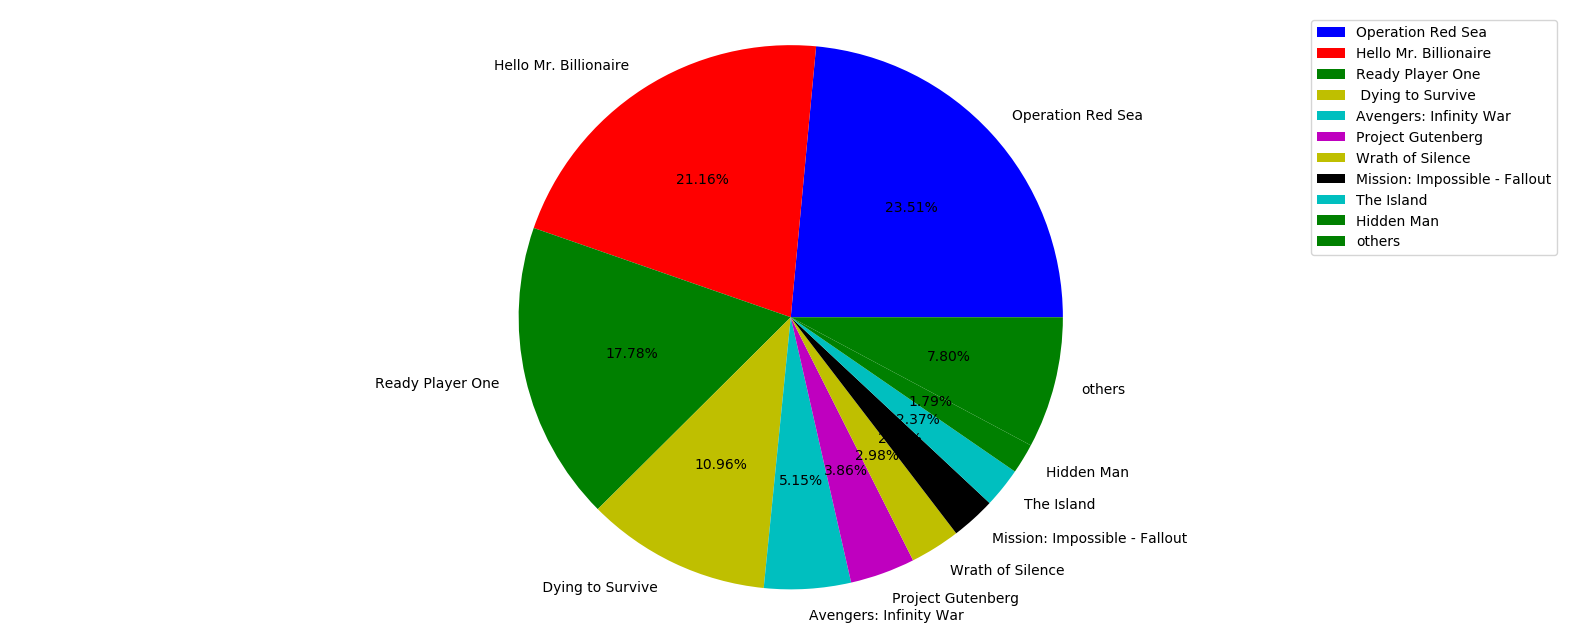

In [32]:
plt.figure(figsize=(20,8),dpi=100)

movie_name = ["Operation Red Sea","Hello Mr. Billionaire","Ready Player One"," Dying to Survive ","Avengers: Infinity War ","Project Gutenberg","Wrath of Silence","Mission: Impossible - Fallout",'The Island','Hidden Man','others']

place_count = [60605,54546,45819,28243,13270,9945,7679,6799,6101,4621,20105]

plt.pie(x=place_count,labels=movie_name,autopct="%3.2f%%",colors=['b','r','g','y','c','m','y','k','c','g','g'])

plt.axis('equal')

plt.legend(loc=0)

plt.show()


## 三. 总结
![](http://pjpf9017m.bkt.clouddn.com/matplotlib_summary.png)